![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [98]:
import pandas as pd
women = pd.read_csv("women_results.csv")
men = pd.read_csv("men_results.csv")

**Exploratory Data Analysis**

In [99]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [100]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [101]:
men.describe()

,Unnamed: 0,home_score,away_score
count,44353.000000,44353.000000,44353.000000
mean,22176.000000,1.740559,1.178793
std,12803.752581,1.748722,1.394580
min,0.000000,0.000000,0.000000
25%,11088.000000,1.000000,0.000000
50%,22176.000000,1.000000,1.000000
75%,33264.000000,2.000000,2.000000
max,44352.000000,31.000000,21.000000


In [102]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [103]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [104]:
women.describe()

,Unnamed: 0,home_score,away_score
count,4884.000000,4884.000000,4884.000000
mean,2441.500000,2.272727,1.431409
std,1410.033688,2.736377,1.974651
min,0.000000,0.000000,0.000000
25%,1220.750000,0.000000,0.000000
50%,2441.500000,1.000000,1.000000
75%,3662.250000,3.000000,2.000000
max,4883.000000,24.000000,24.000000


**Filtering Dataset**

In [105]:
#Limiting women dataframe to only include matches since 2002-01-01 and tournament FIFA World Cup
women = women[(women['date'] >= '2002-01-01') & (women['tournament'] == 'FIFA World Cup')]
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [106]:
women['Total_goals'] = women['home_score'] + women['away_score']
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Total_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


In [107]:
n1 = len(women)
n1

200

In [108]:
#Limiting men dataframe to only include matches since 2002-01-01 and tournament FIFA World Cup
men = men[(men['date'] >= '2002-01-01') & (men['tournament'] == 'FIFA World Cup')]
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [109]:
men['Total_goals'] = men['home_score'] + men['away_score']
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Total_goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [110]:
n2 = len(men)
n2

384

**Determing the correct Hypothesis Test**

(array([  2.,   1.,   3.,   4.,   4.,  17.,  18.,  20.,  26.,  37.,  46.,
         92.,  98., 105., 142., 169., 247., 206., 251., 224., 285., 246.,
        376., 274., 289., 275., 242., 251., 181., 150., 154., 113., 117.,
         92.,  64.,  49.,  30.,  22.,  35.,   9.,  11.,  10.,   2.,   2.,
          2.,   3.,   0.,   1.,   2.,   1.]),
 array([2.505 , 2.5259, 2.5468, 2.5677, 2.5886, 2.6095, 2.6304, 2.6513,
        2.6722, 2.6931, 2.714 , 2.7349, 2.7558, 2.7767, 2.7976, 2.8185,
        2.8394, 2.8603, 2.8812, 2.9021, 2.923 , 2.9439, 2.9648, 2.9857,
        3.0066, 3.0275, 3.0484, 3.0693, 3.0902, 3.1111, 3.132 , 3.1529,
        3.1738, 3.1947, 3.2156, 3.2365, 3.2574, 3.2783, 3.2992, 3.3201,
        3.341 , 3.3619, 3.3828, 3.4037, 3.4246, 3.4455, 3.4664, 3.4873,
        3.5082, 3.5291, 3.55  ]),
 <BarContainer object of 50 artists>)

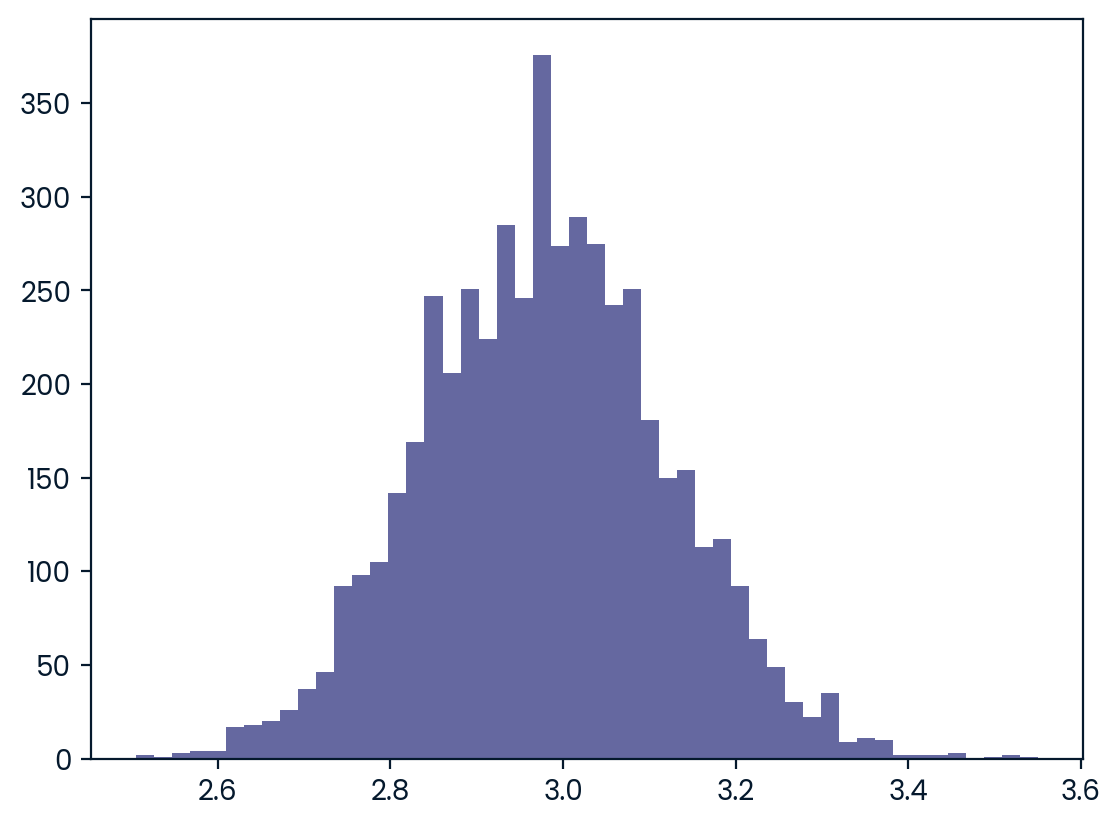

In [111]:
import numpy as np
import matplotlib.pyplot as plt
bootstrap_distn_women = []
for i in range (5000):
    bootstrap_distn_women.append(
    np.mean(women.sample(frac=1, replace=True)['Total_goals']
        )
    )
plt.hist(bootstrap_distn_women,bins=50)

(array([  2.,   0.,   1.,   1.,   0.,   2.,   1.,   6.,  17.,  19.,  23.,
         38.,  49.,  66.,  85., 125., 126., 156., 198., 226., 264., 267.,
        274., 318., 240., 293., 286., 308., 274., 215., 212., 190., 164.,
        142., 106.,  87.,  56.,  51.,  26.,  26.,  21.,  11.,   9.,   8.,
          1.,   4.,   1.,   3.,   1.,   1.]),
 array([2.19010417, 2.20302083, 2.2159375 , 2.22885417, 2.24177083,
        2.2546875 , 2.26760417, 2.28052083, 2.2934375 , 2.30635417,
        2.31927083, 2.3321875 , 2.34510417, 2.35802083, 2.3709375 ,
        2.38385417, 2.39677083, 2.4096875 , 2.42260417, 2.43552083,
        2.4484375 , 2.46135417, 2.47427083, 2.4871875 , 2.50010417,
        2.51302083, 2.5259375 , 2.53885417, 2.55177083, 2.5646875 ,
        2.57760417, 2.59052083, 2.6034375 , 2.61635417, 2.62927083,
        2.6421875 , 2.65510417, 2.66802083, 2.6809375 , 2.69385417,
        2.70677083, 2.7196875 , 2.73260417, 2.74552083, 2.7584375 ,
        2.77135417, 2.78427083, 2.7971875 , 2.

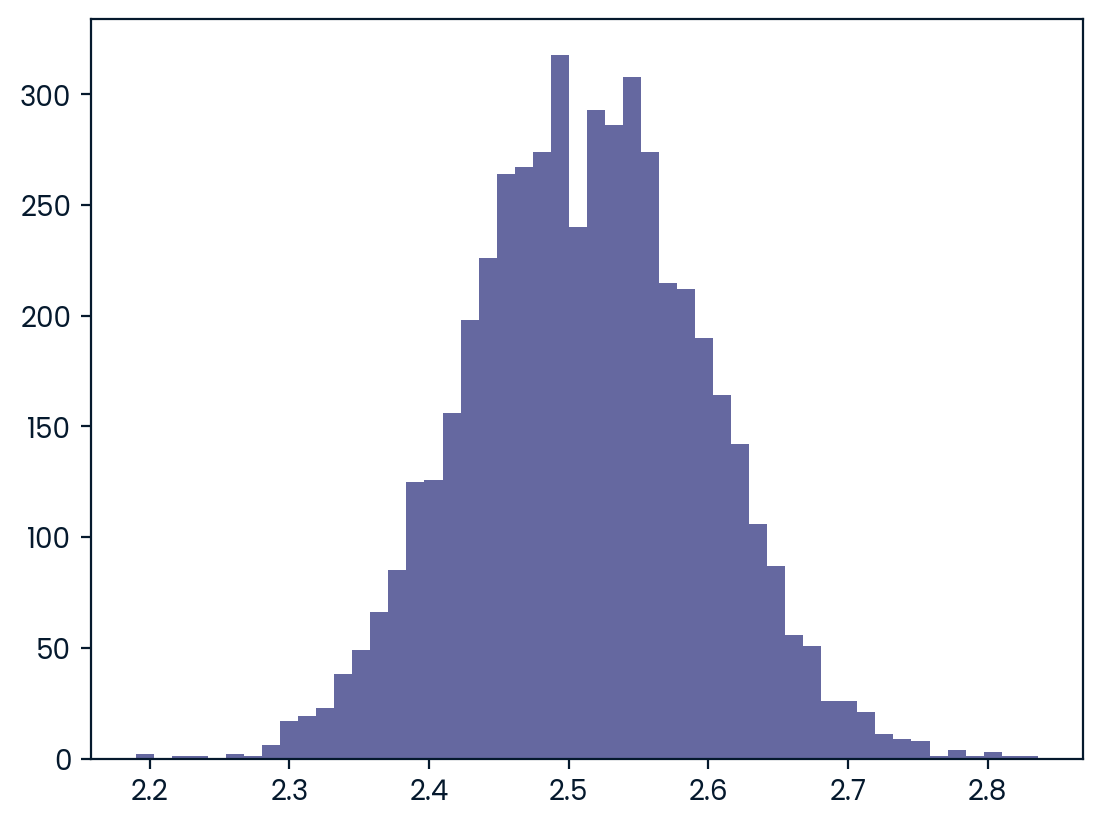

In [112]:
bootstrap_distn_men = []
for i in range (5000):
    bootstrap_distn_men.append(
    np.mean(men.sample(frac=1, replace=True)['Total_goals']
        )
    )
plt.hist(bootstrap_distn_men,bins=50)

In [113]:
women_mean_samp = women['Total_goals'].mean()
women_mean_samp

2.98

In [114]:
women_median = women['Total_goals'].median()
women_median

3.0

In [115]:
std_error = np.std(bootstrap_distn_women, ddof=1)
std_error

0.14144699279006914

In [116]:
men_mean_samp = men['Total_goals'].mean()
men_mean_samp

2.5130208333333335

In [117]:
std_error = np.std(bootstrap_distn_men, ddof=1)
std_error

0.08433391214125582

In [118]:
from scipy.stats import kstest  

# Women's data
stat, p = kstest(women['Total_goals'], 'norm')
print(f"Kolmogorov-Smirnov Test for Women: p-value = {p}")

# Men's data
stat, p = kstest(men['Total_goals'], 'norm')
print(f"Kolmogorov-Smirnov Test for Men: p-value = {p}")


Kolmogorov-Smirnov Test for Women: p-value = 9.431656241073109e-144
Kolmogorov-Smirnov Test for Men: p-value = 4.802304083566536e-230


**Decision making for test**

Kolmogorov-Smirnov Test shows that both groups are non-normal so we will go with Wilcoxon-Mann-Whitney test

In [119]:
import pingouin as pg
mwu_results = pg.mwu(x = women['Total_goals'], 
                      y = men['Total_goals'], 
                      alternative = 'greater')  
mwu_results

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [120]:
p_val = mwu_results["p-val"].values[0] 
p_val

0.005106609825443641

In [121]:
result = "reject" if p_val < 0.10 else "fail to reject"

# Create the dictionary
result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

**Conclusion**

Since p-val <= significance level (0.10) we reject null hypothesis. Hence the mean number of goals scored in women's international soccer matches is greater than men's. 